### TP TNS

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
import scipy.io.wavfile as wav
import os

### ==========SETUP

In [16]:
os.makedirs('Figures', exist_ok=True)
pi = np.pi

In [11]:
def generate_signal(phi_max=2*pi, sig_size=1000):
    n = np.arange(0, sig_size)
    signal = []
    for ech in n :
        signal.append(np.sin(0.05*pi*ech + phi_max*np.random.rand()))

    return signal

In [8]:
def generate_noise(mean=0, std=1, sig_size=1000):
    noise = np.random.normal(mean, std, sig_size)
    return noise

In [17]:
def gen_signals(n_rea=10, sig_size=1000, phi_max=2*pi):
    signalsMat = []
    for rea in range(n_rea):
        signalsMat.append(generate_signal(phi_max, sig_size))
    return signalsMat

In [18]:
def gen_noises(n_rea=10, sig_size=1000, mean=0, std=1):
    noisesMat = []
    for rea in range(n_rea):
        noisesMat.append(generate_noise(mean, std, sig_size))
    return noisesMat

### ==========END SETUP

## <b>Moyenne statistique du signal</b>

#### Q1: <b>n_rea in [10,100,1000]</b>

In [25]:
n_rea = 100
sig_size = 1000
phi_max = 2*pi
window = [0, 50]

In [21]:
signalsMat = gen_signals(n_rea=n_rea, sig_size=sig_size, phi_max=phi_max)

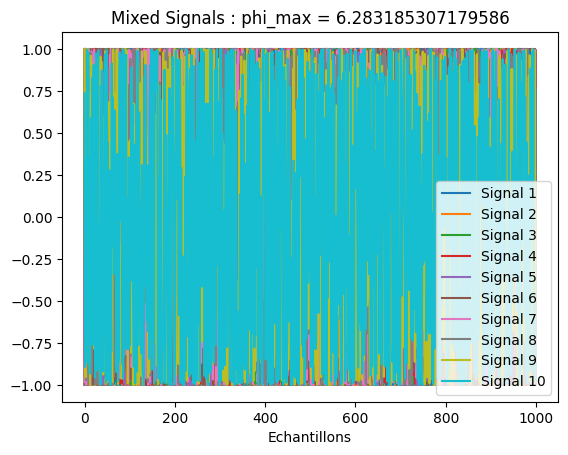

In [22]:
for i in range(len(signalsMat)):
    plt.plot(range(len(signalsMat[i])),signalsMat[i])
plt.legend(["Signal " + str(i+1) for i in range(10)], loc='lower right')
plt.title(f'Mixed Signals : phi_max = {phi_max}')
plt.xlabel('Echantillons')
plt.savefig('Figures/mixed_signals.png')
plt.show()

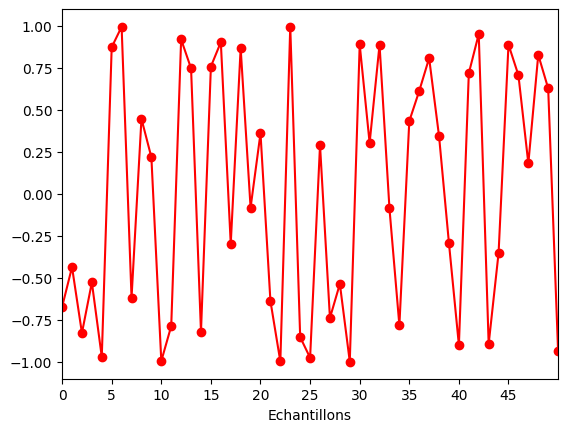

In [27]:
ax = plt.axes()
ax.set_xlim(window)
ax.set_xticks(range(window[0], window[1], 5))
plt.plot(range(len(signalsMat[0])), signalsMat[0], 'r-o')
plt.xlabel('Echantillons')
plt.show()

#### Moyenne et puissance

In [23]:
def moyenne(mat ,n):
    try:
        n_rea = len(mat)
        return sum([mat[i][n] for i in range(n_rea)])/n_rea
    except IndexError:
        print("Index out of range")

In [24]:
def puissance(mat, n0):
    try:
        n_rea = len(mat)
        return sum([mat[i][n0]**2 for i in range(n_rea)])/n_rea
    except IndexError:
        print("Index out of range")

In [29]:
moyennes = [moyenne(signalsMat, i) for i in range(sig_size)]
puissances = [puissance(signalsMat, i) for i in range(sig_size)]

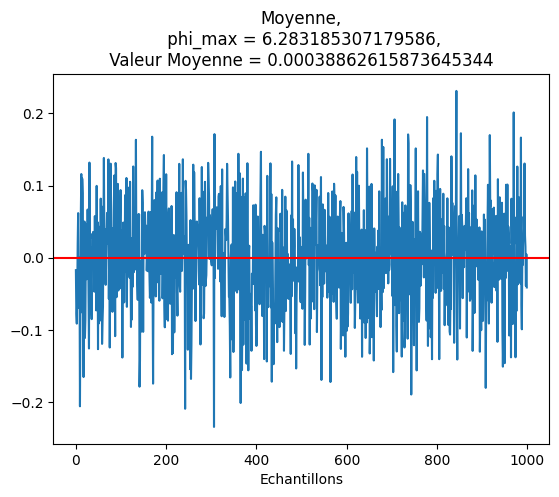

In [30]:
mean_val = np.mean(moyennes)
plt.plot(range(len(moyennes)), moyennes)
plt.title(f'Moyenne,\n phi_max = {phi_max},\n Valeur Moyenne = {mean_val} ')
plt.xlabel('Echantillons')
plt.axhline(y=mean_val, color='r', linestyle='-')
plt.savefig('Figures/moyenne.png')

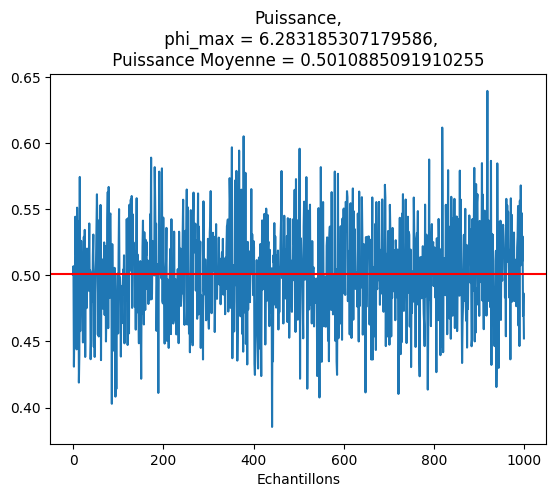

In [32]:
mean_puissance = np.mean(puissances)
plt.plot(range(len(puissances)), puissances)
plt.title(f'Puissance,\n phi_max = {phi_max},\n Puissance Moyenne = {mean_puissance} ')
plt.xlabel('Echantillons')
plt.axhline(y=mean_puissance, color='r', linestyle='-')
plt.savefig('Figures/puissance.png')

Text(0.5, 1.0, 'Distribution de la puissance')

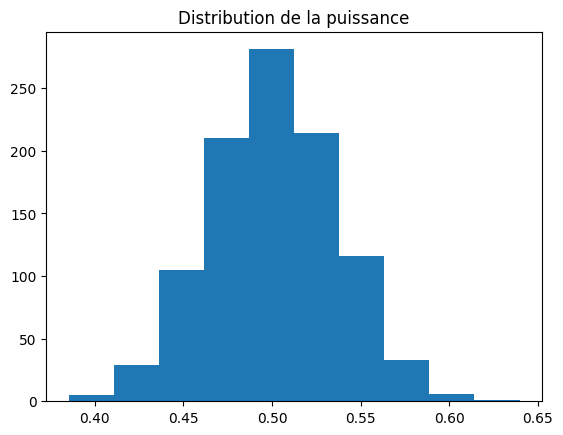

In [34]:
plt.hist(puissances)
plt.title('Distribution de la puissance')

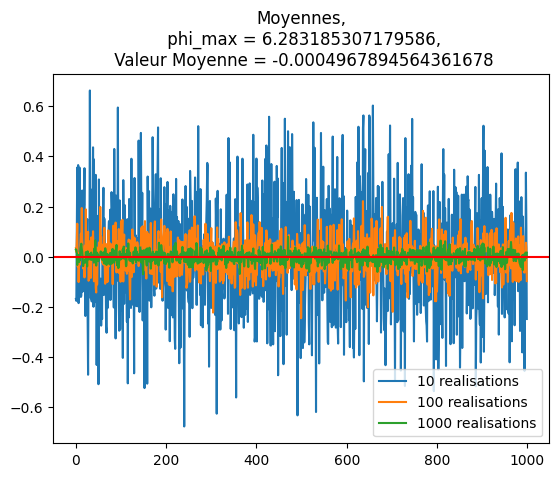

In [35]:
n_reas = [10, 100, 1000]
phi_max = 2*pi
for n_rea in n_reas:
    mat = gen_signals(n_rea=n_rea, sig_size=sig_size, phi_max=phi_max)
    moyennes = [moyenne(mat, i) for i in range(sig_size)]
    mean_val = np.mean(moyennes)
    plt.plot(range(len(moyennes)), moyennes)
    plt.legend([f'{n_rea} realisations' for n_rea in n_reas], loc='lower right')
    plt.title(f'Moyennes,\n phi_max = {phi_max},\n Valeur Moyenne = {mean_val}')
plt.axhline(y=mean_val, color='r', linestyle='-')

#### Q2 : <b>phi_max = pi/4</b>

In [38]:
n_rea = 1000
sig_size = 1000
phi_max = pi/4

In [39]:
signalsMat = gen_signals(n_rea=n_rea, sig_size=sig_size, phi_max=phi_max)

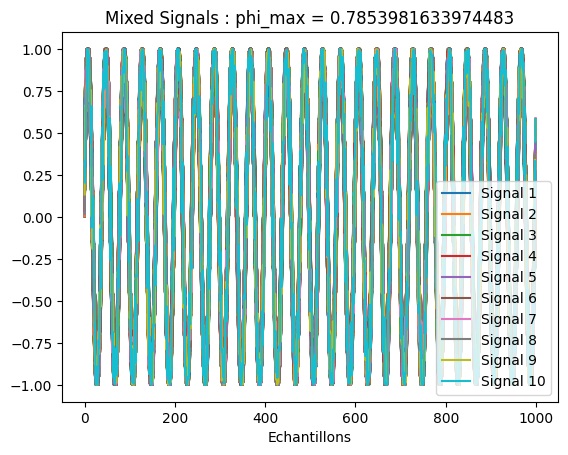

In [40]:
for i in range(len(signalsMat)):
    plt.plot(range(len(signalsMat[i])),signalsMat[i])
plt.legend(["Signal " + str(i+1) for i in range(10)], loc='lower right')
plt.title(f'Mixed Signals : phi_max = {phi_max}')
plt.xlabel('Echantillons')
plt.savefig('Figures/mixed_signals.png')
plt.show()

In [41]:
puissances = [puissance(signalsMat, i) for i in range(sig_size)]
moyennes = [moyenne(signalsMat, i) for i in range(sig_size)]

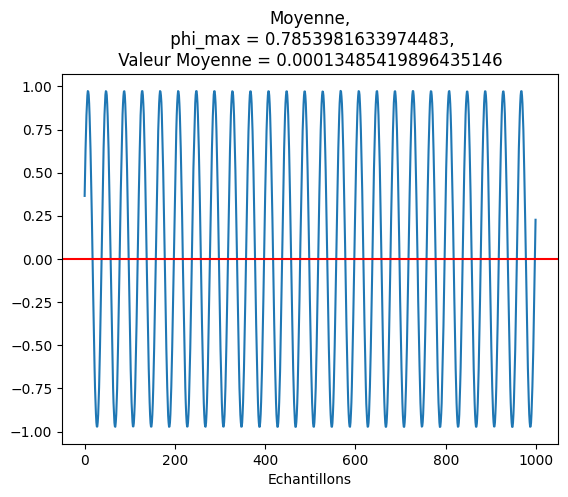

In [42]:
mean_val = np.mean(moyennes)
plt.plot(range(len(moyennes)), moyennes)
plt.title(f'Moyenne,\n phi_max = {phi_max},\n Valeur Moyenne = {mean_val} ')
plt.xlabel('Echantillons')
plt.axhline(y=mean_val, color='r', linestyle='-')
plt.savefig('Figures/moyenne.png')

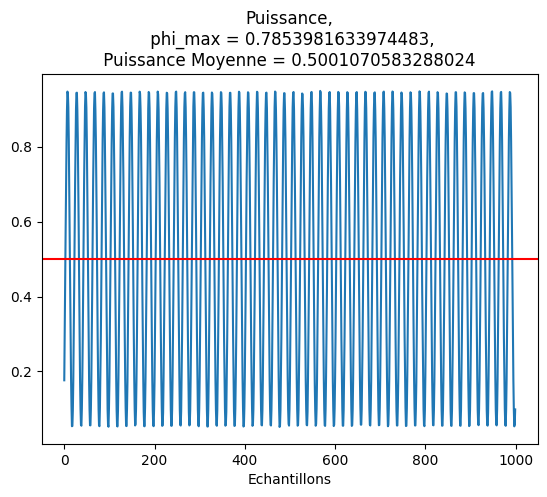

In [43]:
mean_puissance = np.mean(puissances)
plt.plot(range(len(puissances)), puissances)
plt.title(f'Puissance,\n phi_max = {phi_max},\n Puissance Moyenne = {mean_puissance} ')
plt.xlabel('Echantillons')
plt.axhline(y=mean_puissance, color='r', linestyle='-')
plt.savefig('Figures/puissance.png')

Text(0.5, 1.0, 'Distribution de la puissance')

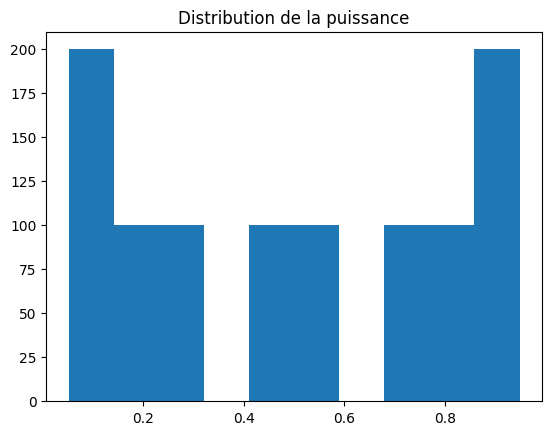

In [44]:
plt.hist(puissances)
plt.title('Distribution de la puissance')

## <b>Moyenne statistique du bruit</b>

#### Q3 :

In [46]:
n_rea = 10**4
mean = 0
var = 0.1

In [47]:
noise = []
for rea in range(n_rea):
    noise.append(generate_noise(mean, var, sig_size))

In [48]:
moyennes = [moyenne(noise, i) for i in range(sig_size)]
puissances = [puissance(noise, i) for i in range(sig_size)]

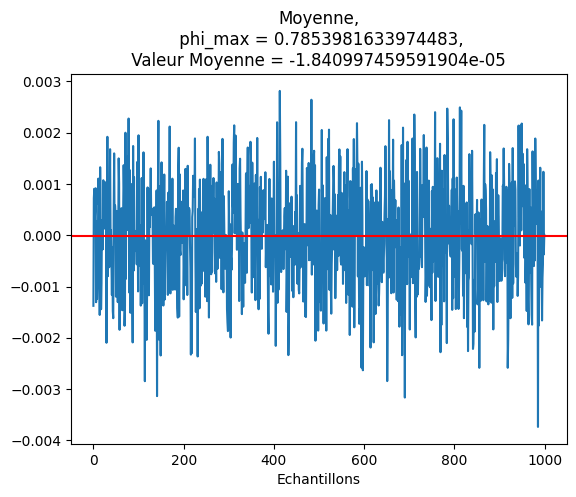

In [49]:
mean_val = np.mean(moyennes)
plt.plot(range(len(moyennes)), moyennes)
plt.title(f'Moyenne,\n phi_max = {phi_max},\n Valeur Moyenne = {mean_val} ')
plt.xlabel('Echantillons')
plt.axhline(y=mean_val, color='r', linestyle='-')
plt.savefig('Figures/moyenne.png')

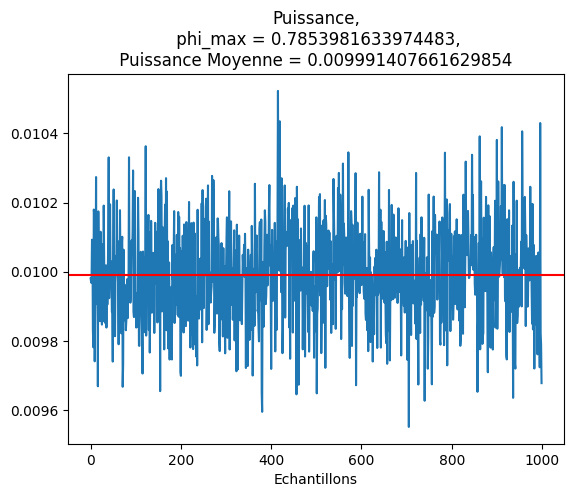

In [50]:
mean_puissance = np.mean(puissances)
plt.plot(range(len(puissances)), puissances)
plt.title(f'Puissance,\n phi_max = {phi_max},\n Puissance Moyenne = {mean_puissance} ')
plt.xlabel('Echantillons')
plt.axhline(y=mean_puissance, color='r', linestyle='-')
plt.savefig('Figures/puissance.png')

#### mean = 1/3, var = 0.01

In [52]:
mean = 1/3
var = 0.01

In [53]:
noise = []
for rea in range(n_rea):
    noise.append(generate_noise(mean, var, sig_size))

In [54]:
moyennes = [moyenne(noise, i) for i in range(sig_size)]
puissances = [puissance(noise, i) for i in range(sig_size)]

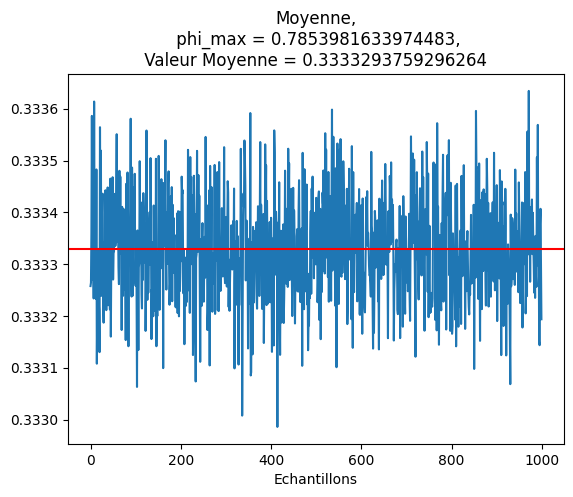

In [55]:
mean_val = np.mean(moyennes)
plt.plot(range(len(moyennes)), moyennes)
plt.title(f'Moyenne,\n phi_max = {phi_max},\n Valeur Moyenne = {mean_val} ')
plt.xlabel('Echantillons')
plt.axhline(y=mean_val, color='r', linestyle='-')
plt.savefig('Figures/moyenne.png')

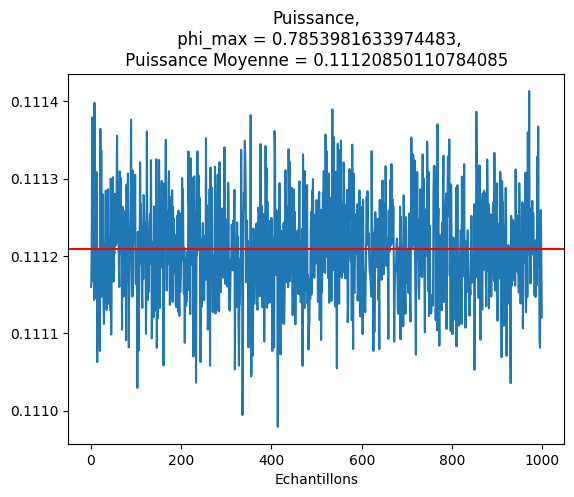

In [56]:
mean_puissance = np.mean(puissances)
plt.plot(range(len(puissances)), puissances)
plt.title(f'Puissance,\n phi_max = {phi_max},\n Puissance Moyenne = {mean_puissance} ')
plt.xlabel('Echantillons')
plt.axhline(y=mean_puissance, color='r', linestyle='-')
plt.savefig('Figures/puissance.png')

## <b>Autocorrelation de d(n)</b>

#### Q4

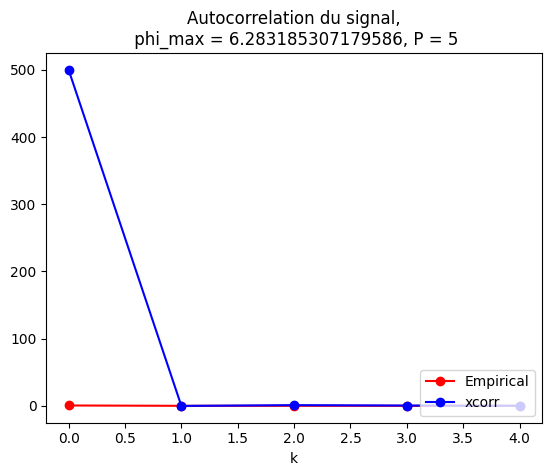

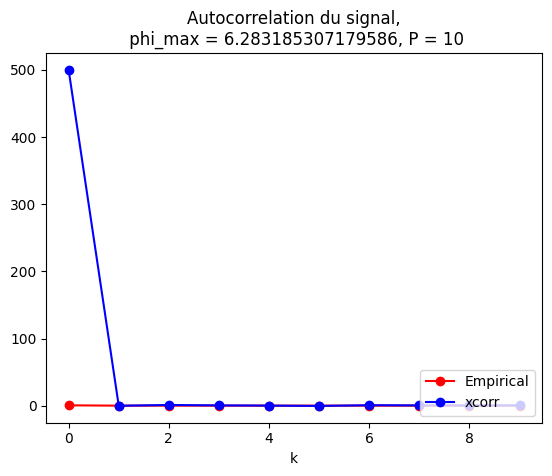

In [61]:
def autocorr_empirical(x):
    n = len(x)
    variance = x.var()
    x = x - x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    result = r / (variance * (np.arange(n, 0, -1)))
    return result

n_rea = 1000
sig_size = 1000
phi_max = 2*np.pi
P = [5, 10]

signalsMat = gen_signals(n_rea=n_rea, sig_size=sig_size, phi_max=phi_max)

rd_empirical = []
for p in P:
    rd_p = []
    for k in range(p):
        rd_p.append(np.mean([signalsMat[i][j]*signalsMat[i][(j+k)%sig_size] for i in range(n_rea) for j in range(sig_size)]) - np.mean(signalsMat)**2)
    rd_empirical.append(rd_p)

rd_xcorr = []
for p in P:
    rd_p = []
    for i in range(n_rea):
        rd_p.append(signal.correlate(signalsMat[i], signalsMat[i], mode='full')[sig_size-1:sig_size+p-1])
    rd_xcorr.append(np.mean(rd_p, axis=0))

for i in range(len(P)):
    plt.plot(range(P[i]), rd_empirical[i], 'r-o')
    plt.plot(range(P[i]), rd_xcorr[i], 'b-o')
    plt.legend(['Empirical', 'xcorr'], loc='lower right')
    plt.title(f'Autocorrelation du signal,\n phi_max = {phi_max}, P = {P[i]}')
    plt.xlabel('k')
    plt.savefig(f'Figures/autocorrelation_{P[i]}.png')
    plt.show()


#### Q5

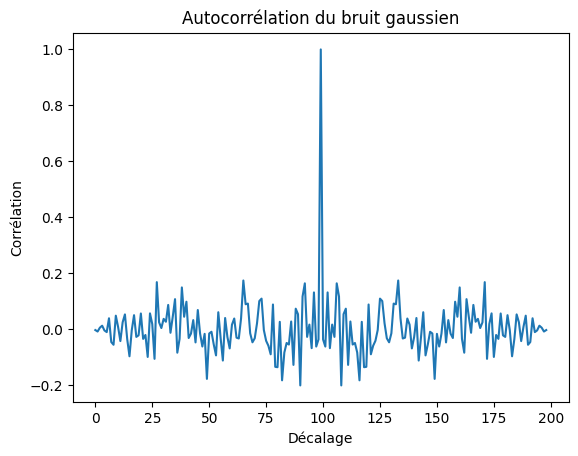

In [63]:
v = np.random.normal(0, 0.01, 100)

corr = np.correlate(v, v, mode='full')

corr = corr / np.max(corr)

plt.plot(corr)
plt.title("Autocorrélation du bruit gaussien")
plt.xlabel("Décalage")
plt.ylabel("Corrélation")
plt.savefig("Figures/autocorr_gauss.png")
plt.show()


## <b>Ergodicite</b>

#### Q6

In [64]:
def mech(sig, n):
    return sum(sig[:n])/n

In [65]:
signal = generate_signal(phi_max=2*pi, sig_size=1000)

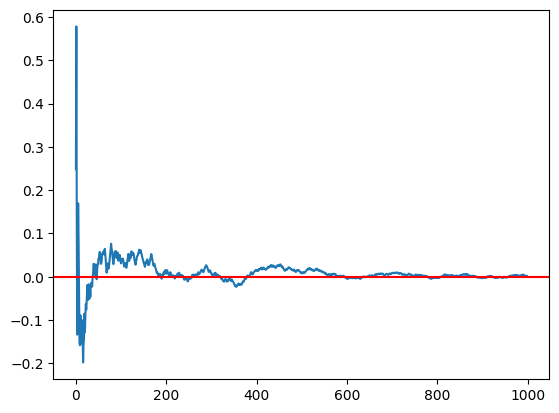

In [67]:
N = len(signal)
mechs = []
for n in range(1, N):
    mechs.append(mech(signal, n))
plt.plot(mechs)
plt.axhline(y=0, color='r', linestyle='-')

#### Q6'

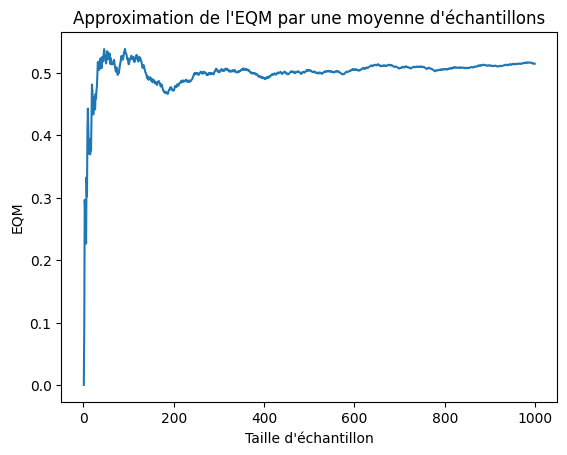

In [68]:
signal = generate_signal(phi_max=2*pi, sig_size=1000)

eqm = []
for n in range(1, len(signal)):
    y_pred = np.mean(signal[:n])
    eqm.append(np.mean((signal[:n] - y_pred)**2))

plt.plot(range(1, len(signal)), eqm)
plt.xlabel('Taille d\'échantillon')
plt.ylabel('EQM')
plt.title('Approximation de l\'EQM par une moyenne d\'échantillons')
plt.savefig('Figures/eqm.png')
plt.show()

## <b>Pour un signal audio</b>

In [ ]:
Fs, x = wav.read('hott_fichier_hne.wav')

Nt = 1000
Lt = 1024
num_frames = Nt * Lt

frame_start = 0
frame_end = Lt
sig = x[frame_start:frame_end]

for i in range(1, Nt):
    frame_start = i * Lt
    frame_end = frame_start + Lt
    sig = np.concatenate((sig, x[frame_start:frame_end]))

Xmat = sig.reshape((Lt, Nt), order='F')